# RCGA
### Task: create FCM based on one input

!['rcga'](figures/gen_alg.png)


### Step 1. Crossover 
- Given two chromosomes and their weights matrixes, we randomly switch n weights between these matrixes 
- Many crossover methods are available
- used with probability of 90%

!['crossover'](figures/crossover.png)

### Step 2. Mutations
Value of randomly chosen weight in the chromosome is being change into new value with the same sign

### Step 3. Selection
Selection is the stage of a genetic algorithm in which individual genomes are chosen from a population for later breeding (using the crossover operator).


**Roulette wheel selection**


Selecting with weight probability, depending on the fitness of the individual gene 
Fitness values [1, 2, 3, 4], then the sum is (1 + 2 + 3 + 4 = 10). Therefore, you would want the probabilities or chances to be [1/10, 2/10, 3/10, 4/10] or [0.1, 0.2, 0.3, 0.4]
The chosen one is taken for the crossover 


**Tournament selection**


Winner of the tournament is being selected for the crossover 
two variants of the selection: with and without replacement

### Step 4. Fitness function 
Fitness is calculated as difference between concept values on each step of the simulation

!['crossover'](figures/fitness.png)

For more information about the algorithms, please check out **LEARNING AND AGGREGATION OF FUZZY COGNITIVE MAPS – AN
EVOLUTIONARY APPROACH**
by
Wojciech Stach

In [2]:
from fcmpy.ml.genetic.rcga import rcga,reshapeW,simulateFCM
import numpy as np

### 2.2.1 Heart attack risk

We used initial FCM presented in the article from arcticle

_Fuzzy cognitive map based approach for determining the risk of ischemic stroke Mahsa Khodadadi_ 1, Heidarali Shayanfar 2, Keivan Maghooli 3, Amir Hooshang Mazinan 1

https://pubmed.ncbi.nlm.nih.gov/31778126/

Do not worry about the empty plot, if you would run it in another IDE, such as VSCode, plot would interactivly display current fitness function  

In [3]:
testc = 7
#

# test 2
nofsteps = 2

# go to the paper and create an initial A0 (shape (1,n)
# and weight matrix n x n

A0 = np.asarray([[0.47, 0.51, 0.13, 0, 1, 0.37, 0.1]])
W_init = np.asarray([[0,0,0.20,0.3,0,0,0.45],
    [0,0,0,0.40,0,0,0.35],
    [0,0,0,0.30,0,0,0.30],
    [0,0,0,0,0,0,0.40],
    [0.30,0,0.15,0.35,0,0,0.25],
    [0.20,0,0.25,0.30,0,0,0.20],
    [0,0,0,0,0,0,0]])




In [4]:
# we reshape weight matrix in such a way that 0 - filled - diagonal is removed and 
W_init = reshapeW(W_init,'in')

# we prepare the placeholder for historical data 

historicaldata = np.zeros((A0.shape[0],A0.shape[1]))
# we prepare the historical data for learning process 

for concepts,i in zip(A0,range(A0.shape[0])):
    historicaldata[i] = simulateFCM(concepts, W_init, nofsteps)
    


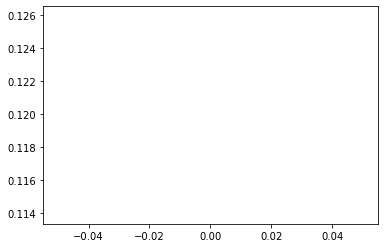

We are at 100/100000
max fitness function so far is 0.9384194415841304
We are at 200/100000
max fitness function so far is 0.9602318603285167
We are at 300/100000
max fitness function so far is 0.9693515951788356
We are at 400/100000
max fitness function so far is 0.9893791560991558
We are at 500/100000
max fitness function so far is 0.989699630403743
We are at 600/100000
max fitness function so far is 0.9906749185169862
We are at 700/100000
max fitness function so far is 0.991564899055859
We are at 800/100000
max fitness function so far is 0.9915790854439447
We are at 900/100000
max fitness function so far is 0.9924249620397454
We are at 1000/100000
max fitness function so far is 0.9935814637442107
We are at 1100/100000
max fitness function so far is 0.9947420775898806
We are at 1200/100000
max fitness function so far is 0.9947420775898806
We are at 1300/100000
max fitness function so far is 0.9951155464200782
We are at 1400/100000
max fitness function so far is 0.9964153246968789
We 

In [8]:
# run the learning algorithm
%%capture
GA = rcga(A0,historicaldata=historicaldata,numberofsteps=nofsteps)
W_final = GA.run()
